In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import subprocess
import sys

# Path del binario del genético
binario = '../bin/genetic_trainer'

# Cosas que no tocaremos
n = 7
m = 6
c = 4
p = str(n*m*2)
generaciones = 50
cross = 'c:completo'
mut = 'm:multi'

# Para crear el comando que ejecuta el genético
def comando_genetico(fitness, seleccion,pob,p_mut):
    res = [binario] + [str(n)]+[str(m)]+[str(c)]+[str(p)]
    res = res+ [str(generaciones)] +[str(pob)]+[str(p_mut)]
    res = res+[fitness]+[seleccion]+[cross]+[mut]
    return res

# Para ejecutar subprocess en shell con stdout live
def shell(command):
    p = subprocess.Popen(command, stdout=subprocess.PIPE, bufsize=1)
    for line in iter(p.stdout.readline, b''):
        sys.stdout.write(line)
    p.stdout.close()
    p.wait()

        
# Para guardar los logs

# Leo los fitness, los formateo en lista
def save_logs(path):
    with open('log/best_fitness_log.dat') as file:
        lista = file.read().splitlines()
    fitness = list(map(float, lista))

    # Leo los progenitores, los formateo en lista 
    with open('log/progenitores.dat') as file:
        lista = file.read().splitlines()
    for i in range(len(lista)):
        lista[i] = lista[i].split(',')
        lista[i] = list(map(float, lista[i]))
    progenitores = lista

    # Leo el ganador
    with open('log/ganador.dat') as file:
        lista = file.read().splitlines()
    ganador_fitness = float(lista[0])
    ganador_genoma = list(map(float, lista[1].split(',')))

    # Guardo todo como una super tupla
    np.save(path,(fitness,progenitores,ganador_fitness,ganador_genoma))

## Cambiando proba mutacion

In [65]:
fit = 'f:vs_random'
sel = 's:rank'
pob = 10
p_mut_s_pablo = [0.5,0.25,0.1,0.05]
p_mut_s_nico = [0.02,0.005]
p_mut_filename_pablo = ["save/genetico/exp_p_mut_" + str(pm) + ".npy" for pm in p_mut_s_pablo]
p_mut_filename_nico = ["save/genetico/exp_p_mut_" + str(pm) + ".npy" for pm in p_mut_s_nico]

## PABLO

In [ ]:
for i in range(len(p_mut_s_pablo)):
    command = comando_genetico(fit,sel,pob,p_mut_s_pablo[i])    
    print("LLAMANDO A: " + reduce(lambda x,y: x +" "+y, command))
    # Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
    shell(command)
    # Guardo los logs
    save_logs(p_mut_filename_pablo[i])    

## NICO

In [66]:
for i in range(len(p_mut_s_nico)):
    command = comando_genetico(fit,sel,pob,p_mut_s_nico[i])    
    # Ejecuto el entrenamiento. En ./log/ me deja los .dat como logs.
    shell(command)
    # Guardo los logs
    save_logs(p_mut_filename_nico[i])  

Creando entrenador...
-------------------------------------------------------
Población: 	10
Generaciones: 	50
P(mutación): 	0.02
Fitness: 	vs random
Crossover: 	completo
Selección: 	por rank
Mutación: 	multi
-------------------------------------------------------
-------------------------------------------------------
> generacion 1
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.9872
> seleccionando 2 progenitores
1	82	80	41	34	84	17	-31	67	89	
0	19	-64	-7	-87	23	-71	-18	92	96	
> genereando nueva población
-------------------------------------------------------
> generacion 2
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.9929
> seleccionando 2 progenitores
0	-77	80	41	34	84	17	-18	67	96	
0	82	80	-7	-87	84	17	-18	92	96	
> genereando nueva población
-------------------------------------------------------
> generacion 3
---------------------------------------

	mejor fitness de la generación: 0.99355
> seleccionando 2 progenitores
0	-77	80	41	-3	84	17	-18	-0	96	
0	-77	80	41	-3	84	17	-18	67	96	
> genereando nueva población
-------------------------------------------------------
> generacion 27
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99455
> seleccionando 2 progenitores
0	-77	80	-0	-3	84	17	-18	-0	96	
0	-77	80	41	-3	84	17	-18	-0	96	
> genereando nueva población
-------------------------------------------------------
> generacion 28
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.9939
> seleccionando 2 progenitores
0	-77	80	-0	-3	84	17	-18	-0	96	
0	-77	80	-0	-3	84	17	-18	-0	96	
> genereando nueva población
-------------------------------------------------------
> generacion 29
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99515
> seleccionando 2 

	mejor fitness de la generación: 0.98995
> seleccionando 2 progenitores
3	-60	-33	-74	-51	-42	78	90	48	57	
1	65	69	31	-2	79	-1	-73	34	91	
> genereando nueva población
-------------------------------------------------------
> generacion 2
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.9963
> seleccionando 2 progenitores
3	-60	69	-74	-51	79	-1	90	48	57	
3	-60	-33	-74	-51	79	78	-73	48	91	
> genereando nueva población
-------------------------------------------------------
> generacion 3
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.9968
> seleccionando 2 progenitores
3	-60	69	-74	-51	79	78	90	48	91	
3	-60	-33	-74	-51	79	78	90	48	91	
> genereando nueva población
-------------------------------------------------------
> generacion 4
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99705
> seleccionan

	mejor fitness de la generación: 0.9974
> seleccionando 2 progenitores
3	-60	69	-74	-51	79	78	90	-32	91	
3	-60	69	-74	-51	79	78	90	-32	91	
> genereando nueva población
-------------------------------------------------------
> generacion 28
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99685
> seleccionando 2 progenitores
3	-60	69	-74	-51	79	78	90	-32	91	
3	-60	69	-74	-51	79	78	90	-32	91	
> genereando nueva población
-------------------------------------------------------
> generacion 29
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99685
> seleccionando 2 progenitores
3	-60	69	-74	-51	79	78	90	-32	91	
3	-60	69	-74	-51	79	78	90	-32	91	
> genereando nueva población
-------------------------------------------------------
> generacion 30
-------------------------------------------------------
> calculando fitness
	mejor fitness de la generación: 0.99685
> sele

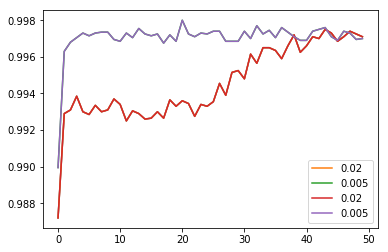

In [78]:
# 
for i in range(len(p_mut_s_nico)+len(p_mut_s_pablo)):
    (fitness,progenitores,ganador_fitness,ganador_genoma) = np.load((p_mut_filename_nico+p_mut_filename_pablo)[i])
    plt.plot(fitness,label=str((p_mut_s_nico+p_mut_s_pablo)[i]))
    
plt.legend()
plt.show()
